In [80]:
import pandas as pd 

In [81]:
# load data
dataset=pd.read_csv('SupplyChain.csv', encoding='unicode_escape')
dataset.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [82]:
# data pre-processing
dataset['Customer Full Name']=dataset['Customer Lname']+dataset['Customer Fname']
dataset['Customer Zipcode']=dataset['Customer Zipcode'].fillna(0)

<AxesSubplot:>

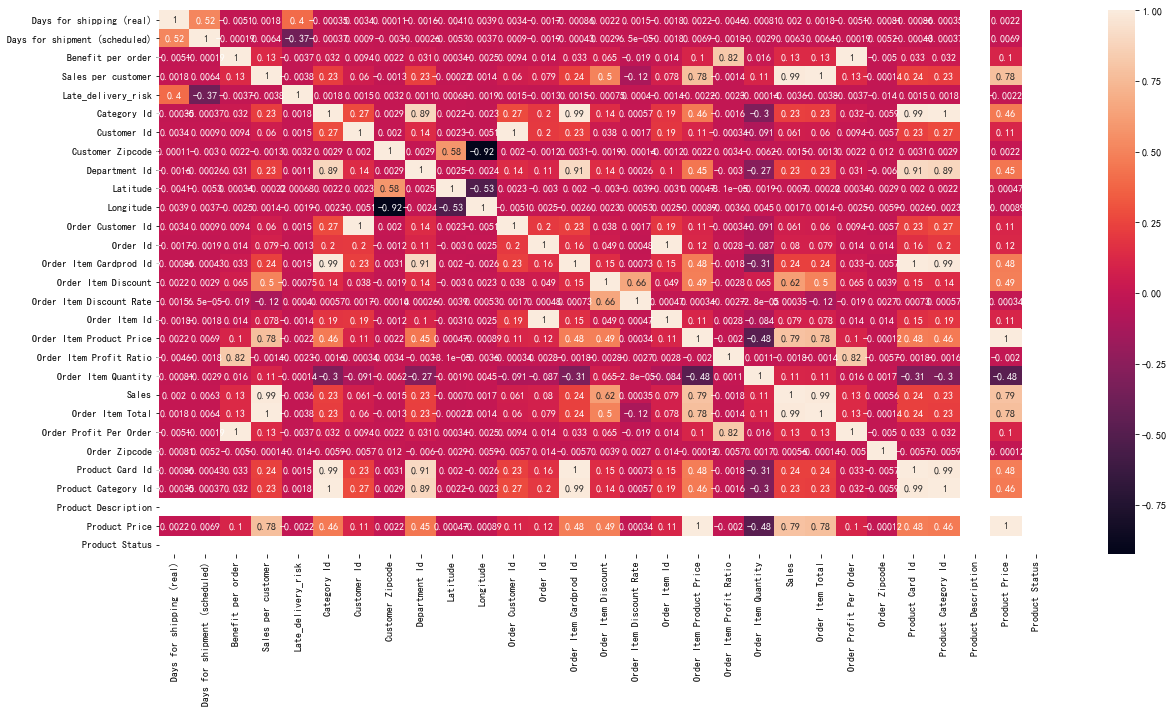

In [83]:
# feature corelation ship
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
data=dataset
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [84]:
market=data.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending=False)

Market
Europe          9.769198e+06
LATAM           9.235762e+06
Pacific Asia    7.434263e+06
USCA            4.553500e+06
Africa          2.061679e+06
Name: Sales per customer, dtype: float64

<AxesSubplot:title={'center':'各个超市的销售额度情况'}, xlabel='Market'>

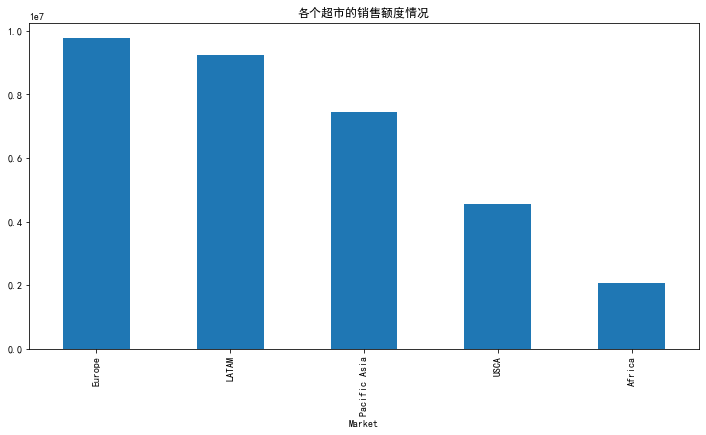

In [85]:
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title="各个超市的销售额度情况")

In [86]:
region=data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending=False)

Order Region
Western Europe     5.296003e+06
Central America    5.093850e+06
South America      2.660244e+06
Northern Europe    1.939362e+06
Southern Europe    1.837526e+06
Oceania            1.809997e+06
Southeast Asia     1.738553e+06
Caribbean          1.481669e+06
West of USA        1.412254e+06
South Asia         1.397365e+06
Eastern Asia       1.334313e+06
East of USA        1.231955e+06
West Asia          1.056081e+06
US Center          1.034129e+06
South of  USA      7.069043e+05
Eastern Europe     6.963072e+05
West Africa        6.541680e+05
North Africa       5.722420e+05
East Africa        3.380543e+05
Central Africa     2.929126e+05
Southern Africa    2.043025e+05
Canada             1.682574e+05
Central Asia       9.795369e+04
Name: Sales per customer, dtype: float64

<AxesSubplot:title={'center':'按照地区销售额的分布情况'}, xlabel='Order Region'>

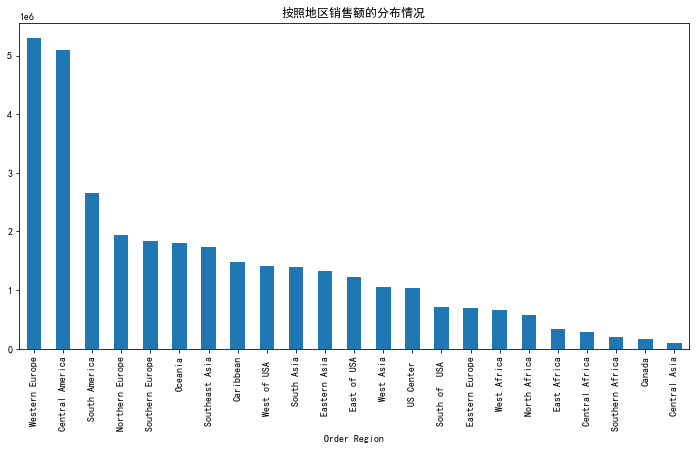

In [87]:
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title="按照地区销售额的分布情况")

In [88]:
category=data.groupby('Category Name')
category['Sales per customer'].sum().sort_values(ascending=False)

Category Name
Fishing                 6.226935e+06
Cleats                  3.982857e+06
Camping & Hiking        3.700784e+06
Cardio Equipment        3.320251e+06
Women's Apparel         2.828708e+06
Water Sports            2.798044e+06
Men's Footwear          2.598494e+06
Indoor/Outdoor Games    2.596454e+06
Shop By Sport           1.177186e+06
Computers               5.953950e+05
Electronics             3.333273e+05
Cameras                 2.404967e+05
Garden                  2.317655e+05
Children's Clothing     2.092684e+05
Crafts                  2.007049e+05
Girls' Apparel          1.362068e+05
Women's Clothing        1.260069e+05
Accessories             1.197125e+05
Sporting Goods          1.050636e+05
Golf Gloves             1.047874e+05
Music                   1.016873e+05
Consumer Electronics    9.793756e+04
Golf Shoes              9.650647e+04
Health and Beauty       9.535811e+04
Kids' Golf Clubs        8.947370e+04
Baseball & Softball     8.436727e+04
Boxing & MMA            

<AxesSubplot:title={'center':'按照商品类别销售额的分布情况'}, xlabel='Category Name'>

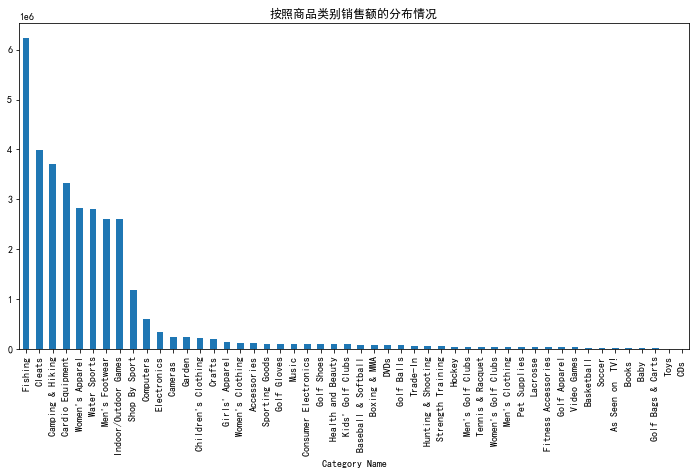

In [89]:
category['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title="按照商品类别销售额的分布情况")

<AxesSubplot:title={'center':'按照商品类别销售额的分布情况'}, xlabel='Category Name'>

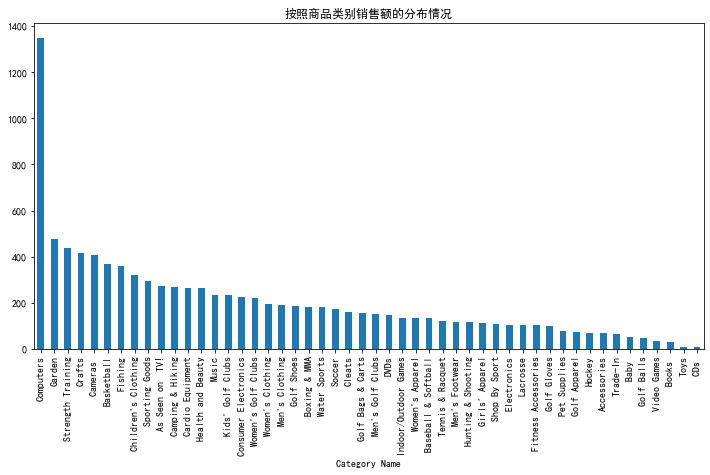

In [90]:
category['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6),title="按照商品类别销售额的分布情况")

In [91]:
temp=pd.DatetimeIndex(data['order date (DateOrders)'])
data['order_year']=temp.year
data['order_month']=temp.month
data['order_weekday']=temp.weekday
data['order_hour']=temp.hour

<AxesSubplot:title={'center':'每小时的平均销售额'}, xlabel='order_hour'>

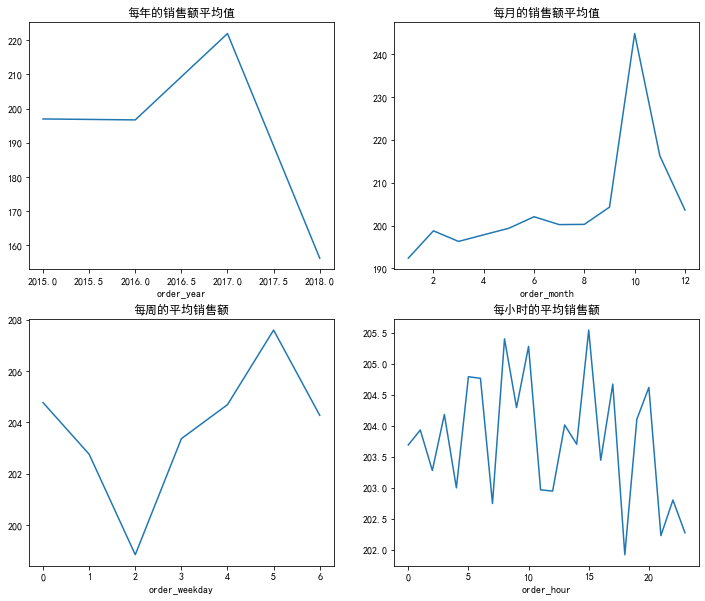

In [92]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
df_year=data.groupby('order_year')
df_year['Sales'].mean().plot(title="每年的销售额平均值")

plt.subplot(2,2,2)
df_month=data.groupby('order_month')
df_month['Sales'].mean().plot(title="每月的销售额平均值")

plt.subplot(2,2,3)
df_weekday=data.groupby('order_weekday')
df_weekday['Sales'].mean().plot(title='每周的平均销售额')

plt.subplot(2,2,4)
df_hour=data.groupby('order_hour')
df_hour['Sales'].mean().plot(title='每小时的平均销售额')

In [93]:
data['order date (DateOrders)']=pd.to_datetime(data['order date (DateOrders)'])
import datetime
present=datetime.datetime(2018,2,1)

In [94]:
customer_seg=data.groupby('Customer Id').agg({
    'order date (DateOrders)':lambda x:(present-x.max()).days,
    'Order Id':lambda x:len(x),
    'Sales':lambda x:x.sum() })
customer_seg.rename(columns={'order date (DateOrders)':'R_Value','Order Id':'F_Value','Sales':'M_Value'},inplace=True)
customer_seg

,R_Value,F_Value,M_Value
Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [95]:
quantiles = customer_seg.quantile(q=[0.25, 0.5, 0.75])
quantiles=quantiles.to_dict()
quantiles

{'R_Value': {0.25: 75.0, 0.5: 159.0, 0.75: 307.0},
 'F_Value': {0.25: 1.0, 0.5: 7.0, 0.75: 15.0},
 'M_Value': {0.25: 293.0400085, 0.5: 1499.82503324, 0.75: 2915.8800654175}}

## RFM

In [96]:
def R_Score(a,b,c):
    if a<=c[b][0.25]:
        return 4
    if a<=c[b][0.5]:
        return 3
    if a<=c[b][0.75]:
        return 2
    return 1

In [97]:
def FM_Score(a,b,c):
    if a<=c[b][0.25]:
        return 1
    if a<=c[b][0.5]:
        return 2
    if a<=c[b][0.75]:
        return 3
    return 4

In [98]:
customer_seg['R_Score']=customer_seg['R_Value'].apply(R_Score,args=('R_Value',quantiles))
customer_seg['F_Score']=customer_seg['F_Value'].apply(FM_Score,args=('F_Value',quantiles))
customer_seg['M_Score']=customer_seg['M_Value'].apply(FM_Score,args=('M_Value',quantiles))
customer_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Customer Id,,,,,,
1,792,1,499.950012,1,1,2
2,136,10,1819.730034,3,3,3
3,229,18,3537.680094,2,4,4
4,380,14,1719.630030,1,3,3
5,457,7,1274.750023,1,2,2
...,...,...,...,...,...,...
20753,0,1,215.820007,4,1,1
20754,0,1,215.820007,4,1,1
20755,0,1,327.750000,4,1,2


In [99]:
def RFM_User(df):
    if df['R_Score']>2 and df['F_Score']>2 and df['M_Score']>2:
        return "重要价值用户"
    if df['R_Score']>2 and df['F_Score']<=2 and df['M_Score']>2:
        return "重要发展用户"    
    if df['R_Score']<=2 and df['F_Score']>2 and df['M_Score']>2:
        return "重要保持用户"
    if df['R_Score']<=2 and df['F_Score']<=2 and df['M_Score']>2:
        return "重要挽留用户"    
    
    if df['R_Score']>2 and df['F_Score']>2 and df['M_Score']<=2:
        return "一般价值用户"
    if df['R_Score']>2 and df['F_Score']<=2 and df['M_Score']<=2:
        return "一般发展用户"    
    if df['R_Score']<=2 and df['F_Score']>2 and df['M_Score']<=2:
        return "一般保持用户"
    if df['R_Score']<=2 and df['F_Score']<=2 and df['M_Score']<=2:
        return "一般挽留用户"   

In [100]:
customer_seg['Customer_Segmentation']=customer_seg.apply(RFM_User,axis=1)
customer_seg

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,Customer_Segmentation
Customer Id,,,,,,,
1,792,1,499.950012,1,1,2,一般挽留用户
2,136,10,1819.730034,3,3,3,重要价值用户
3,229,18,3537.680094,2,4,4,重要保持用户
4,380,14,1719.630030,1,3,3,重要保持用户
5,457,7,1274.750023,1,2,2,一般挽留用户
...,...,...,...,...,...,...,...
20753,0,1,215.820007,4,1,1,一般发展用户
20754,0,1,215.820007,4,1,1,一般发展用户
20755,0,1,327.750000,4,1,2,一般发展用户


In [101]:
pay_type1=data[data['Type']=='DEBIT']
pay_type2=data[data['Type']=='TRANSFER']
pay_type3=data[data['Type']=='PAYMENT']
pay_type4=data[data['Type']=='CASH']
pay_type1

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_weekday,order_hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,HollowayCally,2018,1,2,22
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,TateTana,2018,1,5,11
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,Smart watch,327.750000,0,1/15/2018 10:42,First Class,TerrellConstance,2018,1,5,10
13,DEBIT,2,1,24.580000,245.809998,Late delivery,1,73,Sporting Goods,Caguas,...,Smart watch,327.750000,0,1/15/2018 8:15,First Class,McfaddenNatalie,2018,1,5,8
15,DEBIT,2,1,-259.579987,324.470001,Late delivery,1,73,Sporting Goods,Caguas,...,Smart watch,327.750000,0,1/15/2018 7:33,First Class,LancasterSade,2018,1,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180505,DEBIT,2,4,112.669998,359.980011,Advance shipping,0,45,Fishing,Highland,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 13:28,Standard Class,BriggsChristine,2016,1,5,13
180508,DEBIT,4,2,85.000000,339.980011,Late delivery,1,45,Fishing,Waipahu,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 7:10,Second Class,FuentesRichard,2016,1,5,7
180511,DEBIT,2,2,157.429993,327.980011,Shipping on time,0,45,Fishing,Chula Vista,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 6:28,Second Class,SmithOlivia,2016,1,5,6
180512,DEBIT,6,4,86.400002,319.980011,Late delivery,1,45,Fishing,Caguas,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/22/2016 6:07,Standard Class,MaddenMary,2016,1,5,6


In [102]:
count1=pay_type1['Order Region'].value_counts()
count2=pay_type2['Order Region'].value_counts()
count3=pay_type3['Order Region'].value_counts()
count4=pay_type4['Order Region'].value_counts()
region_num=len(count1)

Index(['Central America', 'Western Europe', 'South America', 'Oceania',
       'Northern Europe', 'Southern Europe', 'Southeast Asia', 'West of USA ',
       'Caribbean', 'South Asia', 'East of USA', 'Eastern Asia', 'US Center ',
       'West Asia', 'Eastern Europe', 'South of  USA ', 'West Africa',
       'North Africa', 'East Africa', 'Central Africa', 'Southern Africa',
       'Canada', 'Central Asia'],
      dtype='object')


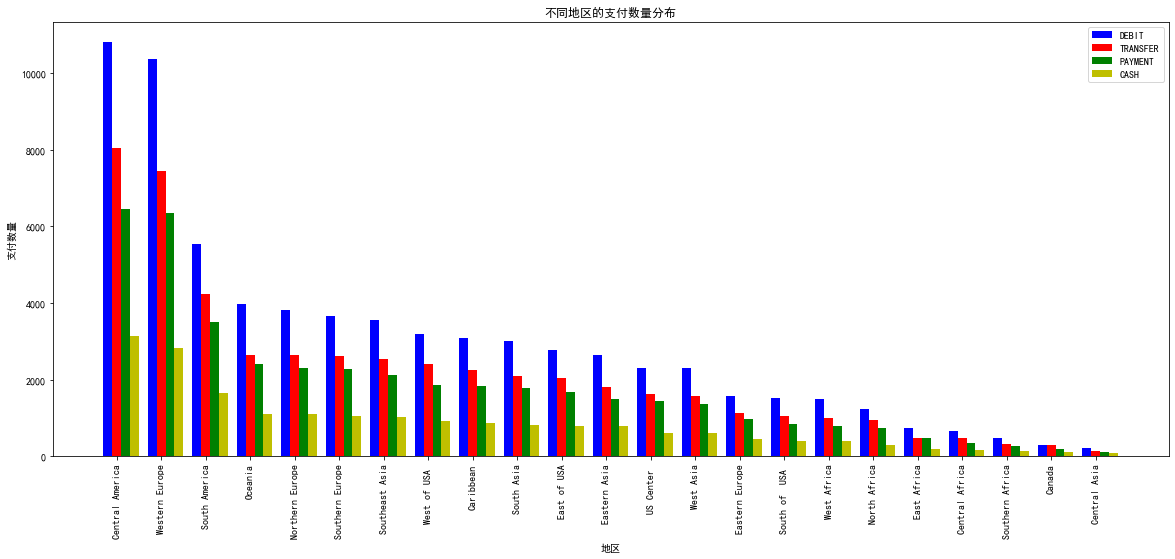

In [103]:
# plot
import numpy as np
fig,ax=plt.subplots(figsize=(20,8))
index=np.arange(region_num)
bar_width=0.2
type1=plt.bar(index,count1,bar_width,color='b',label='DEBIT')
type2=plt.bar(index+bar_width,count2,bar_width,color='r',label='TRANSFER')
type3=plt.bar(index+bar_width*2,count3,bar_width,color='g',label='PAYMENT')
type4=plt.bar(index+bar_width*3,count4,bar_width,color='y',label='CASH')
plt.xlabel("地区")
plt.ylabel("支付数量")
plt.title("不同地区的支付数量分布")
plt.legend()
names=pay_type1['Order Region'].value_counts().keys()
print(names)
plt.xticks(index+bar_width,names,rotation='vertical')
plt.show()

In [104]:
loss=data[data['Benefit per order']<0]
loss

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_weekday,order_hour
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,LunaIrene,2018,1,5,12
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,MaldonadoGillian,2018,1,5,12
15,DEBIT,2,1,-259.579987,324.470001,Late delivery,1,73,Sporting Goods,Caguas,...,Smart watch,327.750000,0,1/15/2018 7:33,First Class,LancasterSade,2018,1,5,7
16,PAYMENT,5,2,-246.360001,321.200012,Late delivery,1,73,Sporting Goods,Canovanas,...,Smart watch,327.750000,0,1/18/2018 7:12,Second Class,GilesBrynne,2018,1,5,7
28,DEBIT,3,4,-17.139999,272.029999,Advance shipping,0,73,Sporting Goods,Roseville,...,Smart watch,327.750000,0,1/16/2018 3:00,Standard Class,KellyEvelyn,2018,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180495,PAYMENT,3,4,-239.990005,299.989990,Advance shipping,0,45,Fishing,Roswell,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 22:35,Standard Class,StewartJohn,2016,1,5,22
180498,CASH,3,4,-337.100006,391.980011,Advance shipping,0,45,Fishing,Lindenhurst,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 19:05,Standard Class,GouldMary,2016,1,5,19
180499,DEBIT,4,2,-258.779999,387.980011,Late delivery,1,45,Fishing,Caguas,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 17:41,Second Class,MasseyAngela,2016,1,5,17
180506,PAYMENT,2,1,-65.470001,351.980011,Late delivery,1,45,Fishing,San Antonio,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 11:01,First Class,SmithLarry,2016,1,5,11


Cleats                  4590
Men's Footwear          4169
Women's Apparel         3923
Indoor/Outdoor Games    3617
Fishing                 3209
Water Sports            2924
Camping & Hiking        2590
Cardio Equipment        2332
Shop By Sport           2154
Electronics              562
Name: Category Name, dtype: int64


<AxesSubplot:title={'center':'订单里面负收益的订单数量产品类别Top10'}>

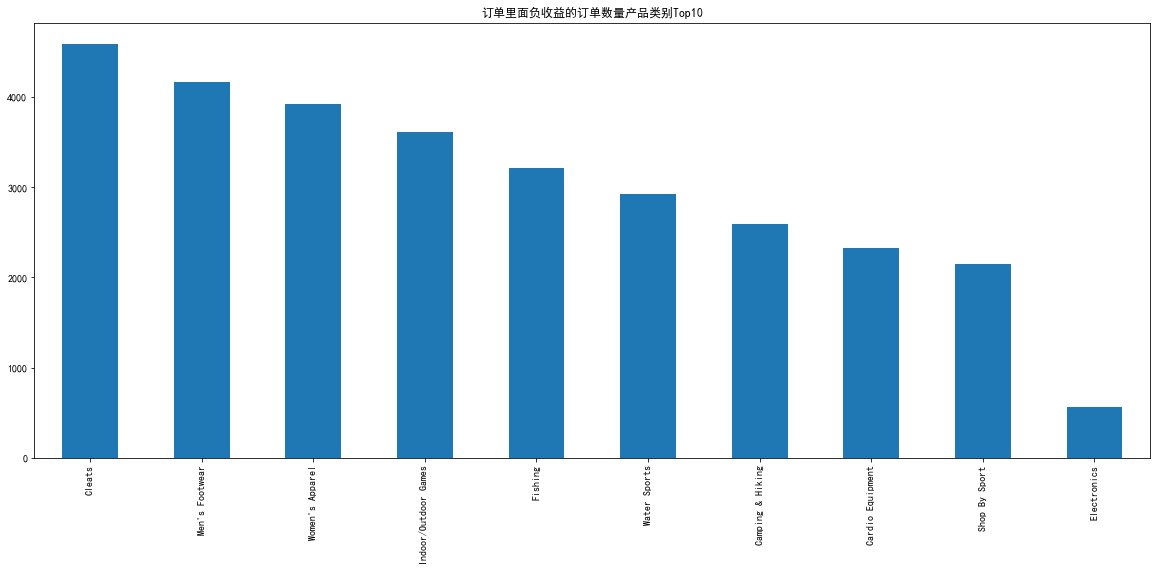

In [105]:
print(loss['Category Name'].value_counts().nlargest(10))#这里只打印前10个
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='订单里面负收益的订单数量产品类别Top10')

<AxesSubplot:title={'center':'订单里面负收益的订单数量地区Top10'}>

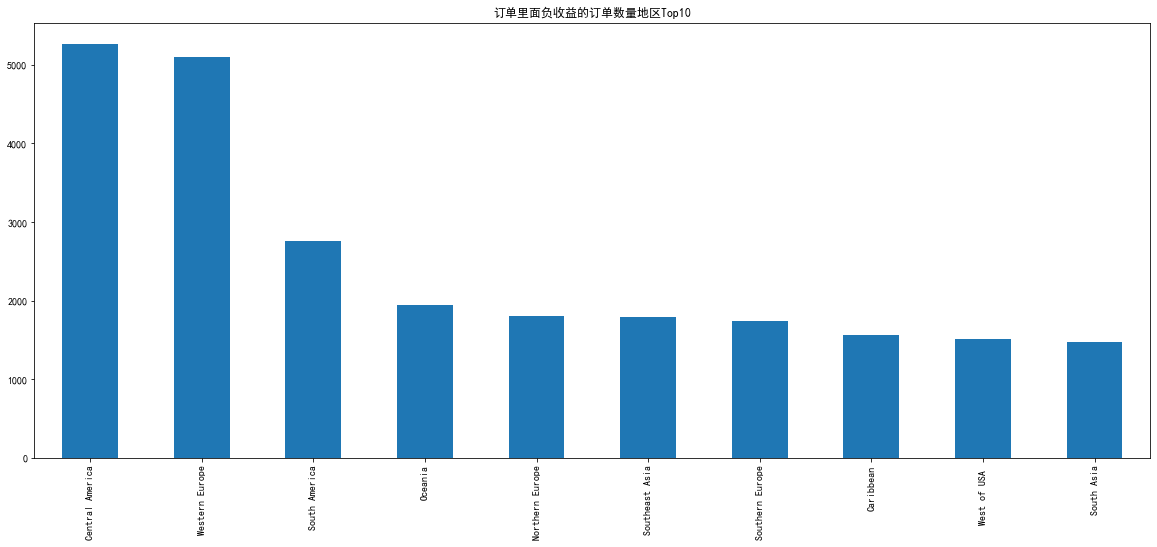

In [106]:
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(20,8),title='订单里面负收益的订单数量地区Top10')

## create train & test data

In [107]:
train_data = data
temp=pd.DatetimeIndex(train_data['order date (DateOrders)']) 
train_data['order_month_year'] = temp.to_period('M')
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_weekday,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,2/3/2018 22:56,Standard Class,HollowayCally,2018,1,2,22,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/18/2018 12:27,Standard Class,LunaIrene,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.750000,0,1/17/2018 12:06,Standard Class,MaldonadoGillian,2018,1,5,12,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.750000,0,1/16/2018 11:45,Standard Class,TateTana,2018,1,5,11,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 11:24,Standard Class,HendricksOrli,2018,1,5,11,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,399.980011,0,1/20/2016 3:40,Standard Class,PetersonMaria,2016,1,5,3,2016-01
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,399.980011,0,1/19/2016 1:34,Second Class,ClarkRonald,2016,1,5,1,2016-01
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,399.980011,0,1/20/2016 21:00,Standard Class,SmithJohn,2016,1,4,21,2016-01
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,399.980011,0,1/18/2016 20:18,Standard Class,SmithMary,2016,1,4,20,2016-01


In [108]:
train_data['fraud']=np.where(train_data['Order Status']=='SUSPECTED_FRAUD',1,0)
train_data['late_delivery']=np.where(train_data['Delivery Status']=='Late delivery',1,0)

In [109]:
train_data.drop(['Customer Email','Customer Password','Product Description','Product Status','Product Image', 'Customer Fname','Customer Lname', 'Order Customer Id','Order Item Cardprod Id','Order Item Id','Sales per customer','Order Item Total', 'Order Profit Per Order','Product Card Id','Product Category Id','Product Price'],axis=1,inplace=True)

In [110]:
train_data.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Id                           0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      0
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0
Order City                            0
Order Country                         0
order date (DateOrders)               0
Order Id                              0
Order Item Discount                   0


In [111]:
train_data.drop(['Order Zipcode','shipping date (DateOrders)','Latitude','Longitude','Customer Street'],axis=1,inplace=True)
train_data.drop(['order date (DateOrders)','order_month_year'],axis=1,inplace=True)
train_data.drop(['Order Status','Delivery Status','Late_delivery_risk'],axis=1,inplace=True)

In [112]:
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order State,Product Name,Shipping Mode,Customer Full Name,order_year,order_month,order_weekday,order_hour,fraud,late_delivery
0,DEBIT,3,4,91.250000,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,...,Java Occidental,Smart watch,Standard Class,HollowayCally,2018,1,2,22,0,0
1,TRANSFER,5,4,-249.089996,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,...,Rajastán,Smart watch,Standard Class,LunaIrene,2018,1,5,12,0,1
2,CASH,4,4,-247.779999,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,...,Rajastán,Smart watch,Standard Class,MaldonadoGillian,2018,1,5,12,0,0
3,DEBIT,3,4,22.860001,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,...,Queensland,Smart watch,Standard Class,TateTana,2018,1,5,11,0,0
4,PAYMENT,2,4,134.210007,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,...,Queensland,Smart watch,Standard Class,HendricksOrli,2018,1,5,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,45,Fishing,Brooklyn,EE. UU.,1005,Home Office,...,Shanghái,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,PetersonMaria,2016,1,5,3,0,0
180515,DEBIT,3,2,-613.770019,45,Fishing,Bakersfield,EE. UU.,9141,Corporate,...,Osaka,Field & Stream Sportsman 16 Gun Fire Safe,Second Class,ClarkRonald,2016,1,5,1,0,1
180516,TRANSFER,5,4,141.110001,45,Fishing,Bristol,EE. UU.,291,Corporate,...,Australia del Sur,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,SmithJohn,2016,1,4,21,0,1
180517,PAYMENT,3,4,186.229996,45,Fishing,Caguas,Puerto Rico,2813,Consumer,...,Australia del Sur,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,SmithMary,2016,1,4,20,0,0


In [113]:
categorical_cols=train_data.select_dtypes(include='object').columns
train_data=train_data.dropna(subset=['Customer Full Name'])

In [114]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for cat in categorical_cols:
    train_data[cat]=le.fit_transform(train_data[cat])
train_data[categorical_cols]

<ipython-input-114-2e386e230c8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[cat]=le.fit_transform(train_data[cat])


,Type,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Product Name,Shipping Mode,Customer Full Name
0,1,40,66,1,0,36,4,3,331,70,15,475,78,3,5638
1,3,40,66,1,0,36,4,3,391,69,13,841,78,3,7388
2,0,40,452,0,0,5,4,3,391,69,13,841,78,3,7510
3,1,40,285,0,2,5,4,3,3226,8,11,835,78,3,12404
4,2,40,66,1,1,36,4,3,3226,8,11,835,78,3,5318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,18,59,0,2,31,3,3,2922,31,7,913,24,3,9834
180515,1,18,26,0,1,5,3,3,1362,77,7,770,24,2,2275
180516,3,18,55,0,1,7,3,3,25,8,11,88,24,3,11821
180517,2,18,66,1,0,36,3,3,25,8,11,88,24,3,11861


In [115]:
numerical_columns=train_data.columns.tolist()
print(numerical_columns,'\n----------------')
print(categorical_cols)
for x in categorical_cols.tolist():
    numerical_columns.remove(x)
numerical_columns

['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State', 'Customer Zipcode', 'Department Id', 'Department Name', 'Market', 'Order City', 'Order Country', 'Order Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Region', 'Order State', 'Product Name', 'Shipping Mode', 'Customer Full Name', 'order_year', 'order_month', 'order_weekday', 'order_hour', 'fraud', 'late_delivery'] 
----------------
Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Product Name', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')


['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Order Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'order_year',
 'order_month',
 'order_weekday',
 'order_hour',
 'fraud',
 'late_delivery']

## create train & test data

In [116]:
from sklearn.metrics import accuracy_score ,recall_score,roc_auc_score,confusion_matrix,f1_score

def model_stats(model,x_train,x_test,y_train,y_test,name='Fraud'):
    model=model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_pred,y_test)
    recall=recall_score(y_pred,y_test)
    auc=roc_auc_score(y_pred,y_test)
    f1=f1_score(y_pred,y_test)
    confusion=confusion_matrix(y_pred,y_test)
    
    print("accuracy：{}".format(accuracy))
    print("recall：{}".format(recall))
    print("Auc：{}".format(auc))
    print("F1-score：{}".format(f1))
    print("confusion matrix：\n{}".format(confusion))

## predict fraud

In [117]:
from sklearn.model_selection import train_test_split
x_fraud=train_data.loc[:,train_data.columns!='fraud']
y_fraud=train_data['fraud']
x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test=train_test_split(x_fraud,y_fraud,test_size=0.2)

In [118]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_fraud_train=sc.fit_transform(x_fraud_train)
x_fraud_test=sc.transform(x_fraud_test)

In [119]:
from sklearn.linear_model import LogisticRegression
model_fraud=LogisticRegression()
model_stats(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,'predict fraud')

accuracy：0.9785890369221394
recall：0.50920245398773
Auc：0.7460342705693465
F1-score：0.3004524886877828
confusion matrix：
[[35164   613]
 [  160   166]]
c:\Users\82514\Documents\projects\bi_learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## predict late_delivery

In [120]:
x_late=train_data.loc[:,train_data.columns!='late_delivery']
y_late=train_data['late_delivery']
x_late_train,x_late_test,y_late_train,y_late_test=train_test_split(x_late,y_late,test_size=0.2)
# normalization
sd=StandardScaler()
x_late_train=sd.fit_transform(x_late_train)
x_late_test=sd.transform(x_late_test)

In [121]:
model_late=LogisticRegression()
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'predict late_delivery')

accuracy：0.9879511397944769
recall：0.9784898383029225
Auc：0.9892449191514612
F1-score：0.9891279898028044
confusion matrix：
[[15880     0]
 [  435 19788]]
c:\Users\82514\Documents\projects\bi_learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
from sklearn import metrics
def model_stats(model,x_train,x_test,y_train,y_test,name='Fraud'):
    model=model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("mse: {}".format(metrics.mean_squared_error(y_pred, y_test)))

## predict Sales

In [123]:
x_late=train_data.loc[:,train_data.columns!='Sales']
y_late=train_data['Sales']
x_late_train,x_late_test,y_late_train,y_late_test=train_test_split(x_late,y_late,test_size=0.2)
# normalization
sd=StandardScaler()
x_late_train=sd.fit_transform(x_late_train)
x_late_test=sd.transform(x_late_test)

In [124]:
from sklearn.linear_model import LinearRegression
model_late=LinearRegression()
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'predict sales')

mse: 932.0875038695041


## predict Order Item Quantity

In [125]:
x=train_data.loc[:,train_data.columns!='Order Item Quantity']
y=train_data['Order Item Quantity']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# normalization
sd=StandardScaler()
x_train=sd.fit_transform(x_train)
x_test=sd.transform(x_test)

In [126]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model_stats(model,x_train,x_test,y_train,y_test,'')

mse: 0.28587305392430434
